# Tutorial:

## An example of statistical data analysis using the R environment for statistical computing

1. Placing statistical analysis in the framework of research questions;
2. Moving from simple to complex methods: first exploration, then selection of promising modelling approaches;
3. Visualising as well as computing;
4. Making correct inferences;
5. Statistical computation and visualization

### Dataset

Soil properties:
1. `Clay` -- Clay content, weight % of the mineral fine earth ( < 2 mm);
2. `CEC` -- Cation exchange capacity, cmol + (kg soil) -1
3. `OC` -- Organic carbon, volume % of the fine earth.

`CEC` is a result of `Clay` and `OC`.
`CEC` is important for soil management, since it controls how
much added artificial or natural fertiliser or liming materials will be
retained by the soil for a long-lasting effect on crop growth. Heavy
doses of fertiliser on soils with low CEC will be wasted, since the extra
nutrients will leach.

Other info:
1. `e`, `n`--  East and North Coordinates, UTM Zone 32N, WGS84 datum, in meters
1. `elev` -- Elevation in meters above sea level
1. `zone` -- Agro-ecological zone, arbitrary code
1. `wrb1` -- Reference soil group, arbitrary code
    1. Acrisols (from the Haplic, Ferralic, and Plinthic subgroups)
    2. Cambisols (from the Ferralic subgroup)
    3. Ferralsols (from the Acri-ferric and Xanthic subgroups )
    
1. `LC` -- Land cover type


The suffixes 1, 2, and 5 on `Clay`, `CEC`, and `OC` refer to the lower boundary of the three depths

In [1]:
obs <- read.csv("obs.csv")
str(obs)

row.names(obs)

obs$zone <- as.factor(obs$zone)
obs$wrb1 <- factor(obs$wrb1, labels=c("a", "c", "f"))

save(obs, file="obs.RData")

'data.frame':	147 obs. of  16 variables:
 $ id   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ e    : int  702638 701659 703488 703421 703358 702334 681328 681508 681230 683989 ...
 $ n    : int  326959 326772 322133 322508 322846 324551 311602 311295 311053 311685 ...
 $ elev : int  657 628 840 707 670 780 720 657 600 720 ...
 $ zone : int  2 2 1 1 2 1 1 2 2 1 ...
 $ wrb1 : int  3 3 3 3 3 3 3 3 3 3 ...
 $ LC   : Factor w/ 8 levels "BF","CF","FF",..: 3 3 4 4 4 4 3 3 4 4 ...
 $ Clay1: int  72 71 61 55 47 49 63 59 46 62 ...
 $ Clay2: int  74 75 59 62 56 53 66 66 56 63 ...
 $ Clay5: int  78 80 66 61 53 57 70 72 70 62 ...
 $ CEC1 : num  13.6 12.6 21.7 11.6 14.9 18.2 14.9 14.6 7.9 14.9 ...
 $ CEC2 : num  10.1 8.2 10.2 8.4 9.2 11.6 7.4 7.1 5.7 6.8 ...
 $ CEC5 : num  7.1 7.4 6.6 8 8.5 6.2 5.4 7 4.5 6 ...
 $ OC1  : num  5.5 3.2 6.98 3.19 4.4 5.31 4.55 4.5 2.3 7.34 ...
 $ OC2  : num  3.1 1.7 2.4 1.5 1.2 3.2 2.15 1.42 1.36 2.54 ...
 $ OC5  : num  1.5 1 1.3 1.26 0.8 ...


[1] "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"   "10"  "11"  "12" 
 [13] "13"  "14"  "15"  "16"  "17"  "18"  "19"  "20"  "21"  "22"  "23"  "24" 
 [25] "25"  "26"  "27"  "28"  "29"  "30"  "31"  "32"  "33"  "34"  "35"  "36" 
 [37] "37"  "38"  "39"  "40"  "41"  "42"  "43"  "44"  "45"  "46"  "47"  "48" 
 [49] "49"  "50"  "51"  "52"  "53"  "54"  "55"  "56"  "57"  "58"  "59"  "60" 
 [61] "61"  "62"  "63"  "64"  "65"  "66"  "67"  "68"  "69"  "70"  "71"  "72" 
 [73] "73"  "74"  "75"  "76"  "77"  "78"  "79"  "80"  "81"  "82"  "83"  "84" 
 [85] "85"  "86"  "87"  "88"  "89"  "90"  "91"  "92"  "93"  "94"  "95"  "96" 
 [97] "97"  "98"  "99"  "100" "101" "102" "103" "104" "105" "106" "107" "108"
[109] "109" "110" "111" "112" "113" "114" "115" "116" "117" "118" "119" "120"
[121] "121" "122" "123" "124" "125" "126" "127" "128" "129" "130" "131" "132"
[133] "133" "134" "135" "136" "137" "138" "139" "140" "141" "142" "143" "144"
[145] "145" "146" "147"

In [2]:
load(file="obs.RData")

str(obs)

'data.frame':	147 obs. of  16 variables:
 $ id   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ e    : int  702638 701659 703488 703421 703358 702334 681328 681508 681230 683989 ...
 $ n    : int  326959 326772 322133 322508 322846 324551 311602 311295 311053 311685 ...
 $ elev : int  657 628 840 707 670 780 720 657 600 720 ...
 $ zone : Factor w/ 4 levels "1","2","3","4": 2 2 1 1 2 1 1 2 2 1 ...
 $ wrb1 : Factor w/ 3 levels "a","c","f": 3 3 3 3 3 3 3 3 3 3 ...
 $ LC   : Factor w/ 8 levels "BF","CF","FF",..: 3 3 4 4 4 4 3 3 4 4 ...
 $ Clay1: int  72 71 61 55 47 49 63 59 46 62 ...
 $ Clay2: int  74 75 59 62 56 53 66 66 56 63 ...
 $ Clay5: int  78 80 66 61 53 57 70 72 70 62 ...
 $ CEC1 : num  13.6 12.6 21.7 11.6 14.9 18.2 14.9 14.6 7.9 14.9 ...
 $ CEC2 : num  10.1 8.2 10.2 8.4 9.2 11.6 7.4 7.1 5.7 6.8 ...
 $ CEC5 : num  7.1 7.4 6.6 8 8.5 6.2 5.4 7 4.5 6 ...
 $ OC1  : num  5.5 3.2 6.98 3.19 4.4 5.31 4.55 4.5 2.3 7.34 ...
 $ OC2  : num  3.1 1.7 2.4 1.5 1.2 3.2 2.15 1.42 1.36 2.54 ...
 $ OC5  : num  1.

In [3]:
# attach(obs)

1. What are the values of soil properties important for agricultural productionand soil ecology in the study area? In particular, the organic matter content (OM), proportion of clay vs. sand and silt (Clay), and the cation exchange capacity (CEC) in the upper 50 cm of the soil.
    1. OM promotes good soil structure, easy tillage, rapid infiltration and reduced runoff (hence less soil loss by surface water erosion); it also adsorbs nutrient cations and is a direct source of Nitrogen;
    2. The proportion of clay has a major influence on soil structure, hard- ness, infiltration vs. runoff; almost all the nutrient cations not adsorbed on the OM are exchanged via the clay;
    3. CEC is a direct measure of how well the soil can adsorb added cations from burned ash, natural animal and green manures, and artificial fertilizers.
2. What is the inter-relation (association, correlation) between these three variables? How much total information do they provide?
3. How well can CEC be predicted by OM, Clay, or both?
4. What is the depth profile of these variables? Are they constant over the first 50 cm depth; if not, how do they vary with depth?
5. Four agro-ecological zones and three major soil groups have been identified by previous mapping. Do the soil properties differ among these? If so, how much? Can the zones or soils groups be grouped or are they all different?
6. Each observation is located geographically. Is there a trend in any of the properties across the region? If so, how much variation does it explain, in which direction is it, and how rapidly does the property vary with distance?
7. Before or after taking any trend into account, is there any local spatial dependence in any of the variables?
8. Is it necessary to do the (expensive) lab. procedure for CEC, or can it be predicted satisfactorily from the cheaper determinations for Clay and OM (or just one of these)?
9. Is it necessary to sample at depth, or can the values at depth be calculated from the values in the surface layer? If so, the cost of soil sampling could be greatly reduced.
10. Are the agro-ecological zones and/or soil maps a useful basis for predicting soil behaviour, and therefore a useful stratification for recommendations?
11. What soil-forming factor explains any regional trend?
12. What soil-forming factor explains any local spatial dependence? Finally, the statistical questions can be used to predict:
13. How well can CEC be predicted by OM, Clay, or both?
14. What are the expected values of the soil properties, and the uncertainties of these predictions, at unvisited locations in the study area? The last question can be answered by a predictive map.

# 1. Multivariate correlation and regression

## 1.1 Multiple Correlation Analysis

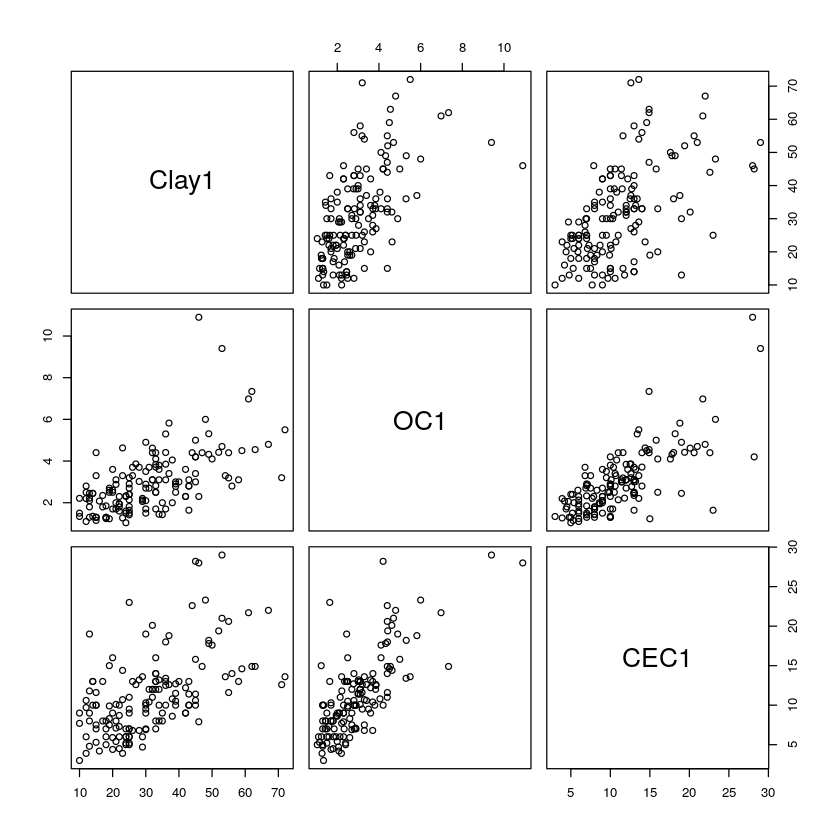

In [4]:
# Pairwise simple correlations
pairs( ~ Clay1 + OC1 + CEC1, data=obs)

In [5]:
# Remove column id
drops <- c("id")
obs <- obs[ , !(names(obs) %in% drops)]

In [6]:
names(obs)

[1] "e"     "n"     "elev"  "zone"  "wrb1"  "LC"    "Clay1" "Clay2" "Clay5"
[10] "CEC1"  "CEC2"  "CEC5"  "OC1"   "OC2"   "OC5"

#### Q60 Pairwise simple correlations
The covariances depend on the measurement scales, whereas the correlations
are standardised to the range [-1, 1] . CEC is highly correlated (r = 0.74) with organic
carbon and somewhat less so (r = 0. 56) with clay content. The two predictors are also
moderately correlated (r = 0.60).

In [7]:
cov(obs[c(10,7,13)])

,CEC1,Clay1,OC1
CEC1,25.94793,39.60916,5.679280
Clay1,39.60916,194.21312,12.502137
OC1,5.67928,12.50214,2.252044


In [8]:
cor(obs[c(10,7,13)])

,CEC1,Clay1,OC1
CEC1,1.0000000,0.5579624,0.7429396
Clay1,0.5579624,1.0000000,0.5978009
OC1,0.7429396,0.5978009,1.0000000


The simple correlations show how two variables are related, but do not answer whether there are any underlying relations between the entire
set. For example, could an observed strong simple correlation between variables
X and Y be because both are in fact correlated to some underlying variable Z?
One way to examine this is by partial correlations, which show the correlation
between two variables after *correcting for all others*.

*Correcting for all others* means the correlation
between the residuals of linear regressions between the two variables to be correlated and all the other variables. If the residuals left over after the regression are correlated, this can't be explained by the variables considered so far, so must be
a true correlation between the two variables of interest.


#### Pairwise partial correlations

CEC and Clay

In [9]:
# CEC is only weakly positively correlated ( r = 0.21 ) to Clay after
# controlling for OC
cor(residuals(lm(CEC1 ~ OC1, obs)), residuals(lm(Clay1 ~ OC1, obs)))

[1] 0.2121414

In [10]:
# CEC appears to be highly correlated to Clay  when not controlling for OC
cor(obs$CEC1, obs$Clay1)

[1] 0.5579624

CEC and OC

In [29]:
cor(residuals(lm(CEC1 ~ Clay1, obs)), residuals(lm(OC1 ~ Clay1, obs)), )

[1] 0.6153842

In [30]:
cor(obs$CEC1, obs$OC1)

[1] 0.7429396

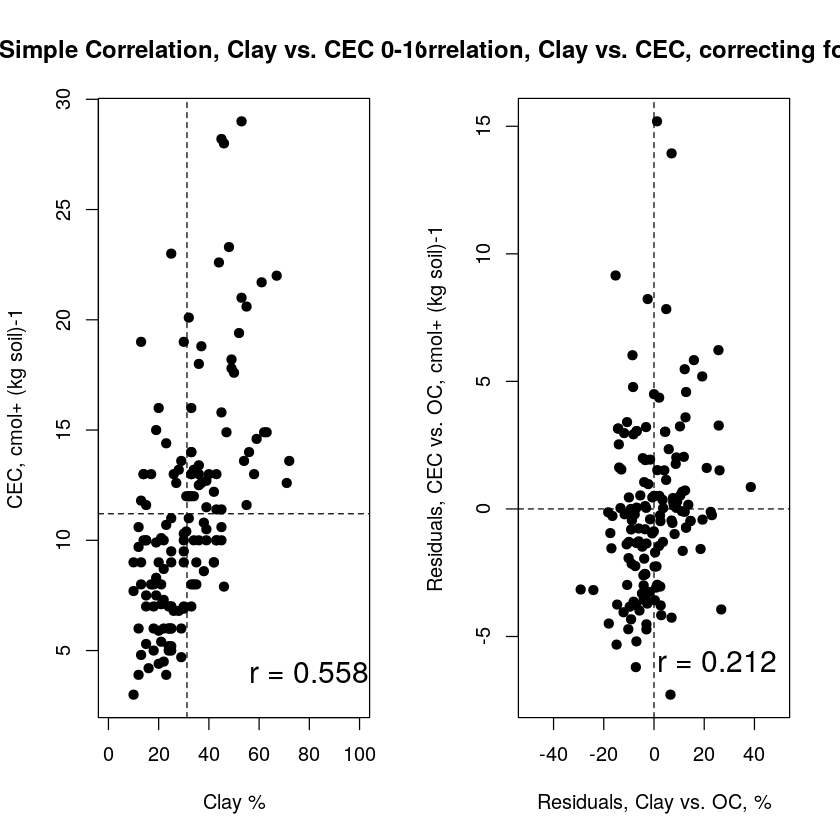

In [35]:
par(mfrow=c(1,2))
par(adj=0.5)
plot(obs$CEC1 ~ obs$Clay1, pch=20, cex=1.5, xlim=c(0,100),
xlab="Clay %",
ylab="CEC, cmol+ (kg soil)-1")
abline(h=mean(obs$CEC1), lty=2); abline(v=mean(obs$Clay1), lty=2)
title("Simple Correlation, Clay vs. CEC 0-10 cm")
text(80, 4, cex=1.5, paste("r =",round(cor(obs$Clay1, obs$CEC1), 3)))
mr.1 <- residuals(lm(obs$CEC1 ~ obs$OC1)); mr.2 <-residuals(lm(Clay1 ~ OC1, obs))
plot(mr.1 ~ mr.2, pch=20, cex=1.5, xlim=c(-50, 50),
xlab="Residuals, Clay vs. OC, %",
ylab="Residuals, CEC vs. OC, cmol+ (kg soil)-1")
abline(h=mean(mr.1), lty=2); abline(v=mean(mr.2), lty=2)
title("Partial Correlation, Clay vs. CEC, correcting for OC 0-10 cm")
text(25, -6, cex=1.5, paste("r =",round(cor(mr.1, mr.2), 3)))
par(adj=0)
rm(mr.1, mr.2)
par(mfrow=c(1,1))

The two scatterplots show that much of the apparent pattern in the simple cor-
relation plot (left) has been removed in the partial correlation plot (right); the
points form a more di↵use cloud around the centroid.

#### Simultaneous computation of partial correlations

Partial correlation can also be obtained from either the **variance-covariance** or simple **correlation** matrix of all the variables by *inverting* it and
then *standardising* this inverse so that the diagonals are all 1 ; the off-diagonals
are then the negative of the partial correlation coefficients.

In [38]:
# R function to compute partial correlations
p.cor <- function(x){
     inv <- solve(var(x))
     sdi <- diag(1/sqrt(diag(inv)))
     p.cor.mat <- -(sdi %*% inv %*% sdi)
     diag(p.cor.mat) <- 1
     rownames(p.cor.mat) <- colnames(p.cor.mat) <- colnames(x)
     return(p.cor.mat) }
p.cor(obs[c(10,7,13)])

,CEC1,Clay1,OC1
CEC1,1.0000000,0.2121414,0.6153842
Clay1,0.2121414,1.0000000,0.3299294
OC1,0.6153842,0.3299294,1.0000000


## 1.2 Multiple Regression Analysis

Objective: Get best predictive equation for CEC

Possible predictors:
* Clay
* OC
* Clay and OC

Steps:
1. Check if there may be some relation [(see previous section)](#1.1-Multiple-Correlation-Analysis)
2. Compute all the regressions; compare to each other and to *null* regression.

In [3]:
lmcec.null <- lm(CEC1 ~ 1, obs); summary(lmcec.null)


Call:
lm(formula = CEC1 ~ 1, data = obs)

Residuals:
   Min     1Q Median     3Q    Max 
-8.204 -3.704 -1.104  1.896 17.796 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.2041     0.4201   26.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.094 on 146 degrees of freedom


In [4]:
lmcec.oc <- lm(CEC1 ~ OC1, obs); summary(lmcec.oc)


Call:
lm(formula = CEC1 ~ OC1, data = obs)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2809 -2.2469 -0.2099  1.5770 15.1936 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.6706     0.6304   5.823 3.57e-08 ***
OC1           2.5218     0.1887  13.365  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.421 on 145 degrees of freedom
Multiple R-squared:  0.552,	Adjusted R-squared:  0.5489 
F-statistic: 178.6 on 1 and 145 DF,  p-value: < 2.2e-16


In [5]:
lmcec.clay <- lm(CEC1 ~ Clay1, obs); summary(lmcec.clay)


Call:
lm(formula = CEC1 ~ Clay1, data = obs)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7065 -3.3512 -0.6446  2.2007 14.1962 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.82623    0.86195   5.599 1.05e-07 ***
Clay1        0.20395    0.02519   8.096 2.11e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.242 on 145 degrees of freedom
Multiple R-squared:  0.3113,	Adjusted R-squared:  0.3066 
F-statistic: 65.55 on 1 and 145 DF,  p-value: 2.107e-13


In [6]:
lmcec.oc.cl <- lm(CEC1 ~ OC1 + Clay1, obs); summary(lmcec.oc.cl)


Call:
lm(formula = CEC1 ~ OC1 + Clay1, data = obs)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7059 -2.0159 -0.3772  1.2887 15.1154 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.71960    0.71790   3.788 0.000222 ***
OC1          2.16240    0.23081   9.369  < 2e-16 ***
Clay1        0.06475    0.02485   2.605 0.010152 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.355 on 144 degrees of freedom
Multiple R-squared:  0.5721,	Adjusted R-squared:  0.5662 
F-statistic: 96.27 on 2 and 144 DF,  p-value: < 2.2e-16


In [7]:
lmcec.cl.oc <- lm(CEC1 ~ Clay1 + OC1, obs); summary(lmcec.cl.oc)


Call:
lm(formula = CEC1 ~ Clay1 + OC1, data = obs)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7059 -2.0159 -0.3772  1.2887 15.1154 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.71960    0.71790   3.788 0.000222 ***
Clay1        0.06475    0.02485   2.605 0.010152 *  
OC1          2.16240    0.23081   9.369  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.355 on 144 degrees of freedom
Multiple R-squared:  0.5721,	Adjusted R-squared:  0.5662 
F-statistic: 96.27 on 2 and 144 DF,  p-value: < 2.2e-16


We can see that when adding `Clay` to the model using only `OC`, $R^2$ increases only  by 0.5662-0.5489=.0173 (1.7%)

This is significant at the $\alpha=0.05$ but not at the $\alpha=0.01$ level

## 1.3 Comparing regression models

#### 1.3.1 adj $R^2$

In [8]:
summary(lmcec.null)$adj.r.squared

[1] 0

In [9]:
summary(lmcec.oc)$adj.r.squared

[1] 0.5488693

In [10]:
summary(lmcec.clay)$adj.r.squared

[1] 0.3065726

In [11]:
summary(lmcec.oc.cl)$adj.r.squared

[1] 0.5661801

#### 1.3.2 AIC

In [12]:
AIC(lmcec.null); AIC(lmcec.oc); AIC(lmcec.clay); AIC(lmcec.oc.cl)

[1] 898.81

[1] 782.788

[1] 845.9817

[1] 778.0189

#### 1.3.3 ANOVA

In [16]:
(a <- anova(lmcec.oc.cl, lmcec.clay))

# Compute the reduction of RSS
# In this case, it's about 38% compared to the simpler model
diff(a$RSS)/a$RSS[2]

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
144,1620.969,NA,NA,NA,NA
145,2608.986,-1,-988.017,87.77125,1.399321e-16


[1] 0.3786977

In [18]:
(a <- anova(lmcec.oc.cl, lmcec.oc))

# Compute the reduction of RSS
diff(a$RSS)/a$RSS[2]

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
144,1620.969,NA,NA,NA,NA
145,1697.357,-1,-76.38782,6.78597,0.01015197


[1] 0.04500399

In [20]:
# TODO: Task 44 -- diaplay two diagnostic plots for the best model

## 1.4 Stepwise multiple regression
Now we let R try out many equations and select the best, using `step`

It  eliminates variables until no more can be eliminated without increasing the AIC.

In [21]:
lms <- step(lm(Clay2 ~ Clay1 + CEC1 + OC1, obs))

Start:  AIC=461.91
Clay2 ~ Clay1 + CEC1 + OC1

        Df Sum of Sq     RSS    AIC
<none>                3223.5 461.91
- OC1    1      81.3  3304.8 463.56
- CEC1   1     179.1  3402.6 467.86
- Clay1  1   21077.8 24301.3 756.85


Best model is the full one (has lowest AIC). However, by removing OC1 or CEC1 there's not a large difference (i.e. they are statistically valid, although not so useful).

In [22]:
lms <- step(lm(Clay5 ~ Clay1 + CEC1 + OC1 + Clay2 + CEC2 + OC2, obs))

Start:  AIC=420.7
Clay5 ~ Clay1 + CEC1 + OC1 + Clay2 + CEC2 + OC2

        Df Sum of Sq    RSS    AIC
- CEC1   1      0.73 2338.8 418.75
- OC1    1      8.66 2346.8 419.24
- OC2    1     12.16 2350.3 419.46
- Clay1  1     27.25 2365.4 420.40
<none>               2338.1 420.70
- CEC2   1     48.46 2386.6 421.72
- Clay2  1   1763.89 4102.0 501.33

Step:  AIC=418.75
Clay5 ~ Clay1 + OC1 + Clay2 + CEC2 + OC2

        Df Sum of Sq    RSS    AIC
- OC1    1     10.88 2349.7 417.43
- OC2    1     11.51 2350.4 417.47
- Clay1  1     31.15 2370.0 418.69
<none>               2338.8 418.75
- CEC2   1     75.89 2414.7 421.44
- Clay2  1   1966.50 4305.3 506.45

Step:  AIC=417.43
Clay5 ~ Clay1 + Clay2 + CEC2 + OC2

        Df Sum of Sq    RSS    AIC
- OC2    1      5.49 2355.2 415.77
- Clay1  1     21.30 2371.0 416.75
<none>               2349.7 417.43
- CEC2   1     66.90 2416.6 419.55
- Clay2  1   2294.24 4644.0 515.58

Step:  AIC=415.77
Clay5 ~ Clay1 + Clay2 + CEC2

        Df Sum of Sq    RSS    AI

The resulting best model is Clay5 ~ Clay1 + Clay2 + CEC2

## 1.5 Combining discrete and continuous predictors

One-way ANOVA on a factor and univariate regression on a continuous predictor are particular cases of linear modelling - They can be combined in a multiple regression

In [24]:
lm5z <- lm(Clay5 ~ zone, obs); summary(lm5z)


Call:
lm(formula = Clay5 ~ zone, data = obs)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.950  -5.396   0.159   3.159  24.050 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   55.000      3.209  17.138  < 2e-16 ***
zone2          0.950      3.515   0.270  0.78737    
zone3        -11.159      3.407  -3.275  0.00132 ** 
zone4        -23.667      3.548  -6.671 5.18e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.077 on 143 degrees of freedom
Multiple R-squared:  0.5126,	Adjusted R-squared:  0.5023 
F-statistic: 50.12 on 3 and 143 DF,  p-value: < 2.2e-16


In [25]:
lm51 <- lm(Clay5 ~ Clay1, obs); summary(lm51)


Call:
lm(formula = Clay5 ~ Clay1, data = obs)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.6258  -3.1907   0.0055   3.3875  14.1500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.75856    1.15561   16.23   <2e-16 ***
Clay1        0.82891    0.03377   24.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.687 on 145 degrees of freedom
Multiple R-squared:  0.806,	Adjusted R-squared:  0.8047 
F-statistic: 602.4 on 1 and 145 DF,  p-value: < 2.2e-16


In [26]:
lm5z1 <- lm(Clay5 ~ zone + Clay1, obs); summary(lm5z1)


Call:
lm(formula = Clay5 ~ zone + Clay1, data = obs)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.0863  -2.9937   0.1505   3.1385  13.8878 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.32443    2.90540   6.651 5.83e-10 ***
zone2        5.69448    2.10604   2.704  0.00769 ** 
zone3        2.25099    2.18312   1.031  0.30425    
zone4       -0.65940    2.53650  -0.260  0.79527    
Clay1        0.73558    0.04525  16.256  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.385 on 142 degrees of freedom
Multiple R-squared:  0.8296,	Adjusted R-squared:  0.8248 
F-statistic: 172.9 on 4 and 142 DF,  p-value: < 2.2e-16


This is called parallel regression. Specifies an additive model. One regression line (for the continuous predictor) which is displaced vertically according to the mean value of the discrete predictor.

O sea: que segun el valor de la zona, voy a tener una media u otra. La pendiente depende solamente de Clay1.

The only effect of the discrete predictor is to adjust the mean.

In [27]:
# Look at the residuals
stem(residuals(lm5z1))


  The decimal point is at the |

  -24 | 1
  -22 | 
  -20 | 
  -18 | 
  -16 | 
  -14 | 
  -12 | 
  -10 | 540
   -8 | 77104
   -6 | 10099662
   -4 | 888539854322
   -2 | 8655321009876110
   -0 | 9866654322110987666555321
    0 | 00122334445679023444466688889
    2 | 0334488900122333345568
    4 | 0336800058
    6 | 35792244
    8 | 5
   10 | 11188
   12 | 49



(see pdf for more work on this)

## 1.6 Diagnosing multi-collinearity

We can reduce a regression equation by examining the relation between predictors and predictand for multi-collinearity: if two variables are perfectly related, one can be eliminated because it won't add information as a predictor.

**Variance Inflation Factor** (VIF) measures the effect of a set of predictors on the variance of the coefficient of another predictor. Square root of VIF gives the increase in std error of the coefficient in the full model, compared with the *uncorrelated* case.